In [1]:
# KNN의 한계 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
fish_df = pd.read_csv('data/Fish.csv')

In [4]:
fish_df[fish_df['Species'] == 'Perch'].head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [5]:
perch_length = np.array(fish_df[fish_df['Species'] == 'Perch']['Length2'])
perch_weight = np.array(fish_df[fish_df['Species'] == 'Perch']['Weight'])

In [6]:
# reshape


In [7]:
# shape확인
perch_length.shape

(56,)

In [8]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [10]:
# shape
print(X_train.shape, X_test.shape)

(42, 1) (14, 1)


In [11]:
# KNN 회귀로 학습 n_neighbors=3
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [12]:
# 농어의 길이가 50인 생선에 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [13]:
distance, idxs = knr.kneighbors([[50]])
distance2, idxs2 = knr.kneighbors([[100]])

print(idxs2)

[[34  8 14]]


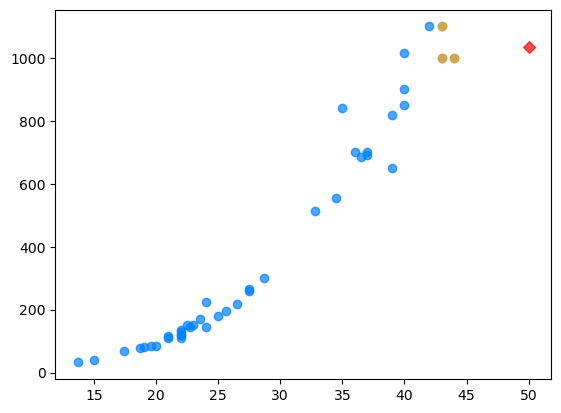

In [14]:
# perch_length, perch_weight 시각화, 길이 50인 농어가 참조한 3개의 생선도 시각화 

plt.scatter(X_train, y_train, color='#0080ff', alpha=0.7)

plt.scatter([50], [1033.33333333], color='red', alpha=0.7, marker='D')
plt.scatter(X_train[idxs], y_train[idxs], color='#fa1', alpha=0.7)



plt.show()



## 선형회귀(Linear Regression )

y = ax + b 


In [16]:
# 선형회귀로 농어 무게 예측 

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [18]:
lr.predict([[50]])

array([1241.83860323])

In [19]:
# 모델이 학습한 기울기와 절편의 값 확인 

In [20]:
coef = lr.coef_
intercept = lr.intercept_

print(coef, intercept)
print(50 * coef + intercept) # predict 

[39.01714496] -709.0186449535477
[1241.83860323]


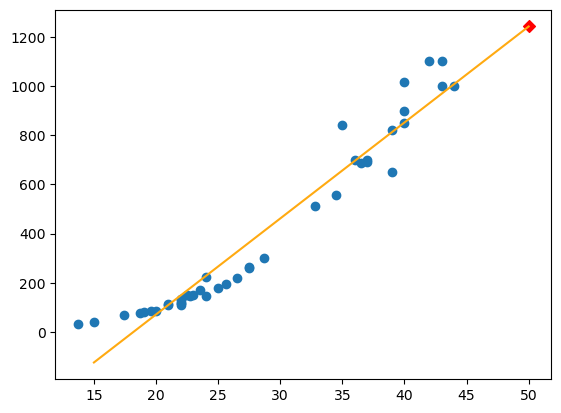

In [21]:
# 농어의 학습데이터 산점도와 길이가 15에서 50까지의 무게 그리기 

plt.scatter(X_train, y_train)
plt.plot([15, 50], [15 * coef + intercept, lr.predict([[50]])], color='#fa1')
plt.scatter([[50]], lr.predict([[50]]), color='red', marker='D')

In [22]:
15 * coef + intercept

array([-123.7614705])

In [23]:
lr.predict([[19]])

array([32.30710936])

In [24]:
# 결정계수 

In [25]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.939846333997604
0.8247503123313558


길이 15 ~ 20 사이의 무게가 마이너스가 나온다 

y = ax^2 + bx + c 2차 함수로 변경 

다항회귀 

In [199]:
aa = np.array([[1],[2],[3],[4]])
print(aa)

[[1]
 [2]
 [3]
 [4]]


In [201]:
bb = np.column_stack((aa**3, aa**2, aa))
print(bb)

[[ 1  1  1]
 [ 8  4  2]
 [27  9  3]
 [64 16  4]]


In [231]:
train_poly = np.column_stack((X_train**2, X_train))
test_poly = np.column_stack((X_test**2, X_test))

In [69]:
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [90]:
print(X_train.shape)
print(train_poly.shape)

(42, 1)
(42, 2)


In [71]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


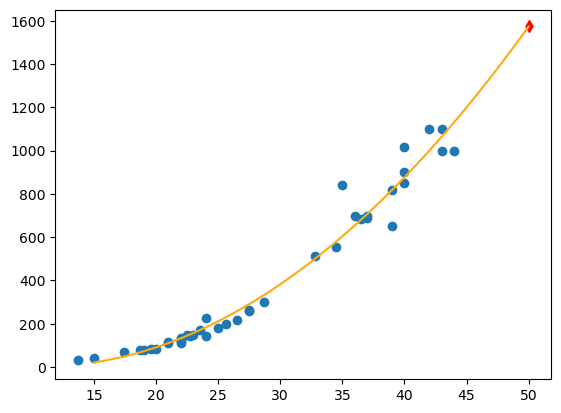

In [114]:
point = np.arange(15, 51)
plt.scatter(X_train, y_train)
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_, color='#fa1')
plt.scatter(50, lr.predict([[50**2, 50]]), marker='d', color='red')

In [129]:
print(lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)

[  20.90606071   30.79243112   42.70746575   56.6511646    72.62352767
   90.62455496  110.65424646  132.71260219  156.79962213  182.91530629
  211.05965467  241.23266727  273.43434409  307.66468513  343.92369038
  382.21135986  422.52769355  464.87269146  509.24635359  555.64867994
  604.07967051  654.5393253   707.0276443   761.54462753  818.09027497
  876.66458663  937.26756251  999.89920261 1064.55950693 1131.24847547
 1199.96610822 1270.7124052  1343.48736639 1418.2909918  1495.12328143
 1573.98423528]


In [108]:
lr.score(train_poly, y_train)

0.9706807451768623

In [110]:
lr.score(test_poly, y_test)

0.9775935108325121

In [237]:
train_poly3 = np.column_stack((X_train**3, X_train**2, X_train))
test_poly3 = np.column_stack((X_test**3, X_test**2, X_test))

In [239]:
lr = LinearRegression()
lr.fit(train_poly3, y_train)
print(lr.predict([[50**3, 50**2, 50]]))

[1379.41727785]


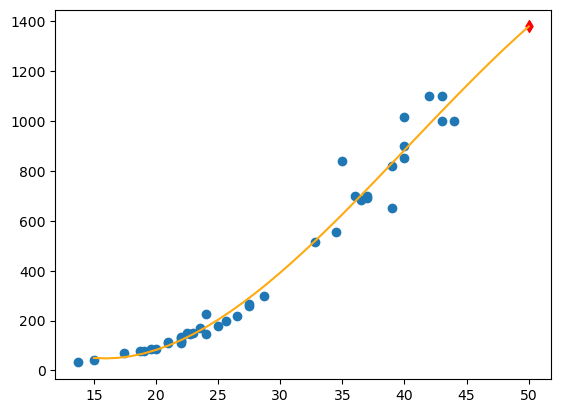

In [241]:
point = np.arange(15, 51)
plt.scatter(X_train, y_train)
plt.plot(point, lr.coef_[0] * point ** 3 + lr.coef_[1] * point ** 2 + lr.coef_[2] * point + lr.intercept_, color='#fa1')
plt.scatter(50, lr.predict([[50**3, 50**2, 50]]), marker='d', color='red')

In [243]:
lr.score(train_poly3, y_train)

0.9729178478354533

In [247]:
lr.score(test_poly3, y_test)

0.958836372742297